In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Problem Statement : A company spent certain amount of money in different sectors like R-D, Admin, Marketing; based on those amount along with the locations of the branch the company has certain amount of profits. We gotta predict the profit based on these features.

In [27]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
states = pd.get_dummies(dataset['State'])
states.head() ##So, basically pd.get_dummies returns a dataframe object

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [29]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
dataset.drop('State',axis=1,inplace=True)
dataset = pd.concat([dataset, states], axis=1)

In [31]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


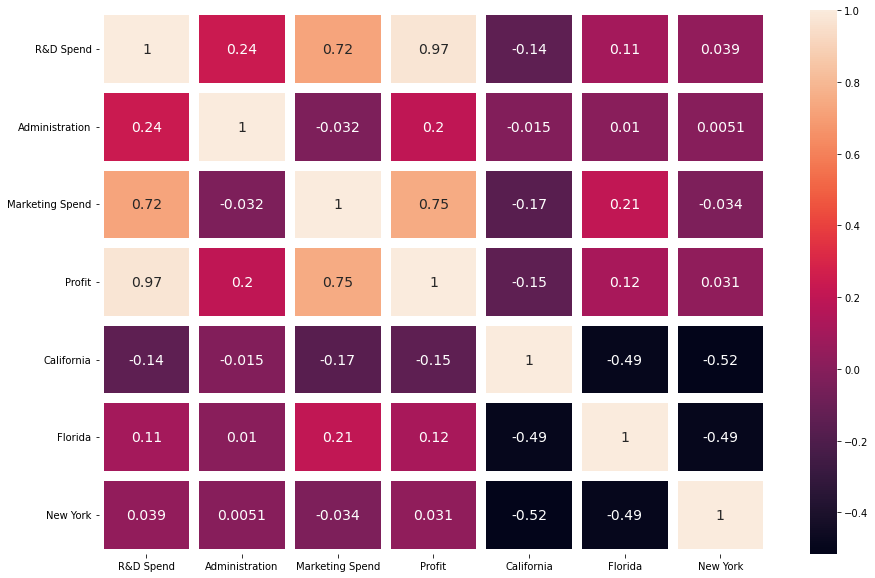

In [52]:
fig = plt.figure(figsize=(15,10))
import seaborn as sns
dataset_cor = dataset.corr()
annot_kws = {'fontsize':14}
fig = sns.heatmap(dataset_cor, linewidths=10, annot=True, annot_kws = annot_kws)

Lets look the most correlated features with the target column Profit.

In [54]:
dataset_cor['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Florida            0.116244
New York           0.031368
California        -0.145837
Name: Profit, dtype: float64

In [55]:
X = dataset.drop('Profit', axis=1)
y = dataset['Profit']  ##as the target variable is the Profit column

In [56]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'California',
       'Florida', 'New York'],
      dtype='object')

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9347068473282424